# Pre Requisites

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('notebook/data/data.csv')

In [6]:
X = df.drop(columns="math_score", axis=1)

In [7]:
y = df['math_score']

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

# Column Transformation

In [10]:
# Create Column Transformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer  = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler",num_transformer,num_features),
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Function to map evaluation metrics

In [13]:
def evaluate_model(true, predicted):
    mae  = mean_absolute_error(true, predicted)
    rmse = root_mean_squared_error(true, predicted)
    r2   = r2_score(true, predicted)

    return mae, rmse, r2

# Model Training

In [14]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list    = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)       # Train Model

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-"*50)


    print("Model Performance for Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*50)
    print("\n")


LinearRegression
Model Performance for Training Set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
--------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
--------------------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor
Model Performance for Training Set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.51

### Results

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2 Score"]).sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

,Model Name,R2 Score
0,Ridge,0.880593
1,LinearRegression,0.880345
2,AdaBoostRegressor,0.854217
3,CatBoostRegressor,0.851632
4,RandomForestRegressor,0.848369
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,KNeighborsRegressor,0.783813
8,DecisionTreeRegressor,0.761813


In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred_lin= lin_model.predict(X_test)
lin_score = r2_score(y_test, y_pred_lin)
print("Accuracy of the model is %.2f" %lin_score)

Accuracy of the model is 0.88


#### Plotting predictions and truth

Text(0, 0.5, 'Predicted')

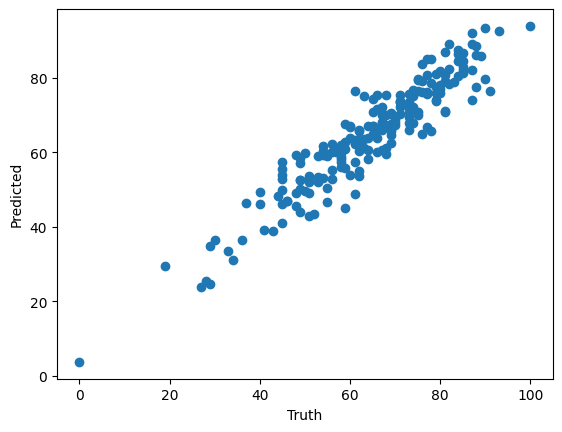

In [19]:
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Truth")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

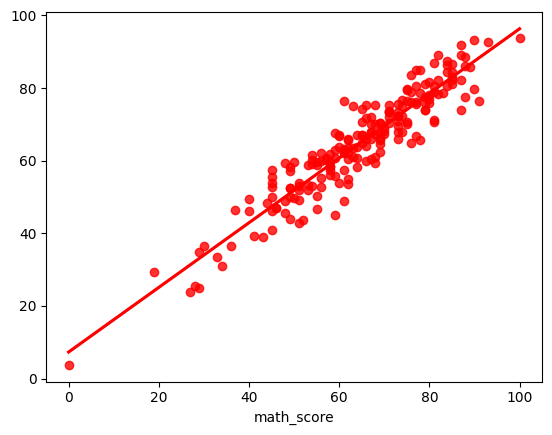

In [20]:
sns.regplot(x=y_test, y=y_pred_lin, ci=None, color='red')

#### Difference between Actual and Predicted Values

In [21]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred_lin, 'Difference':y_test-y_pred_lin})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
